In [1]:
import os
import copy
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import IPythonConsole, IntStringMap
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import rdBase, RDConfig
from rdkit.Chem import rdMolTransforms

In [2]:
sdf = Chem.SDMolSupplier(os.path.join(RDConfig.RDDocsDir, 'Book/data/cdk2.sdf'))

In [3]:
mols = [m for m in sdf]
for m in mols:
    rdDepictor.Compute2DCoords(m)

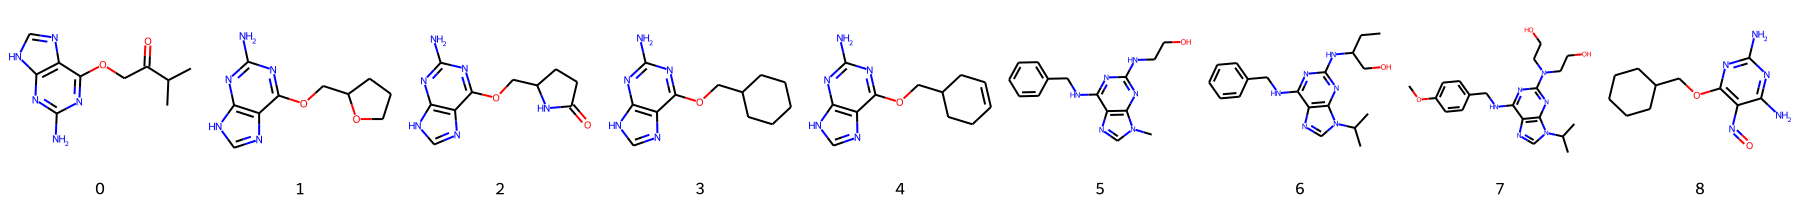

In [4]:
Draw.MolsToImage(mols[:9], legends=[str(i) for i in range(9)])

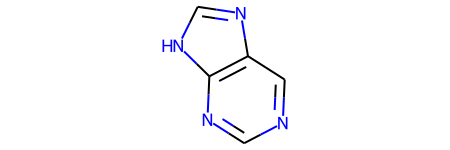

In [5]:
scaff = MurckoScaffold.GetScaffoldForMol(mols[0])
scaff

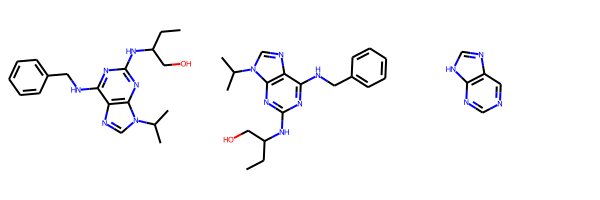

In [6]:
i = 6
probmol = copy.deepcopy(mols[i])
rdDepictor.GenerateDepictionMatching2DStructure(probmol, scaff)
Draw.MolsToGridImage([mols[i], probmol, scaff])

In [7]:
def rot_ar_z(radi):
    return  np.array([[np.cos(radi), -np.sin(radi), 0, 0],
                      [np.sin(radi), np.cos(radi), 0, 0],
                      [0, 0, 1, 0],
                     [0, 0, 0, 1]], dtype=np.double)

In [8]:
rdMolTransforms.TransformConformer(scaff.GetConformer(0), rot_ar_z(2*np.pi/4))

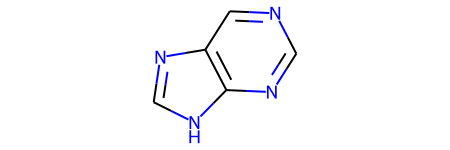

In [9]:
scaff

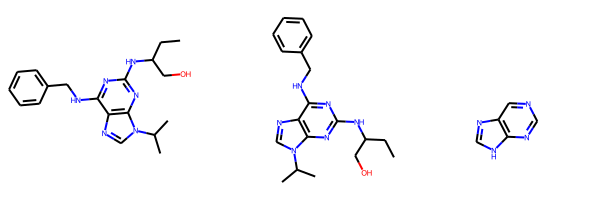

In [10]:
i = 6
probmol = copy.deepcopy(mols[i])
rdDepictor.GenerateDepictionMatching2DStructure(probmol, scaff)
Draw.MolsToGridImage([mols[i], probmol, scaff])